In [1]:
from pathlib import Path
from glob import glob

import cartopy.crs as ccrs
import iris
from IPython.display import HTML, clear_output
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as ndimage
import xarray as xr
import xesmf as xe

from mcs_prime import mcs_prime_config_util as cu

In [2]:
datadir = cu.PATHS['datadir']
simdir = datadir / 'UM_sims'

EXPTS = {
    'ctrl': 'u-di727',    
    'vanillaMCSP': 'u-di728',    
    'stochMCSP': 'u-dg135',
}
nens = 10

In [3]:
imerg_path = '/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/imerg_processed/N216grid/2020-07-01_04:00:00-2020-07-11_03:00:00/3B-HHR.MS.MRG.3IMERG.2020-07-01_04:00:00-2020-07-11_03:00:00.hourly.V07B.nc'
imerg = xr.load_dataarray(imerg_path)

In [4]:
expt_pflux = {}
for expt, suite in EXPTS.items():
    pflux_path = simdir / f'{suite}/processed/{expt}/engla_pa.precip.nc'
    pflux = xr.load_dataarray(pflux_path)
    pflux.values *= 3600 
    pflux.attrs['units'] = 'mm h-1'
    expt_pflux[expt] = pflux


In [5]:
def compare_imerg_pflux_times(imerg, pflux):
    # IMERG has an array of times with items: cftime.DatetimeJulian
    # You can convert to DatetimeIndex as follows:
    imerg_time = xr.CFTimeIndex(imerg.time.values).to_datetimeindex()
    pflux_time = pd.DatetimeIndex(pflux.time)
    return (imerg_time == pflux_time).all()

for expt in EXPTS:
    assert compare_imerg_pflux_times(imerg, expt_pflux[expt]), f'IMERG-pflux times do not match for {expt}'

/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_1225/2649704582.py:4: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  imerg_time = xr.CFTimeIndex(imerg.time.values).to_datetimeindex()


In [6]:
pflux

<xarray.DataArray 'precipitation_flux' (ens_mem: 10, time: 240, latitude: 324,
                                        longitude: 432)>
array([[[[5.70086058e-08, 5.74511994e-08, 5.85264708e-08, ...,
          5.68275098e-08, 5.60472415e-08, 5.63795197e-08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [7.21303046e-01, 7.26718545e-01, 7.34093964e-01, ...,
          7.07209826e-01, 7.14155972e-01, 7.16285586e-01],
         [1.00384855e+00, 1.02276850e+00, 1.04259682e+00, ...,
          9.68939006e-01, 9.79902506e-01, 9.94887888e-01],
         [7.78948843e-01, 7.75864601e-01, 7.75398076e-01, ...,
          7.81451881e-01, 7.82793224e-01, 7.82975435e-01]],

        [[5.49123236e-08, 5.43240404e-08, 5.23717496e-08, ...,
          5.80393476e-08, 5.65898510e-08, 5.49389405e-08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
          3.53207439e-02, 3.51383872e-02, 3.56202051e-02],
         [1.65125638e-01, 1.74480468e-01, 2.09647432e-01, ...,
          1.39187798e-01, 1.44335702e-01, 1.43901274e-01],
         [4.11710054e-01, 4.26549584e-01, 4.36830729e-01, ...,
          3.87872964e-01, 4.03528064e-01, 4.13347960e-01]],

        [[2.32850880e-06, 2.23825032e-06, 2.17700472e-06, ...,
          2.37576569e-06, 2.42896135e-06, 2.37770382e-06],
         [6.34760954e-06, 6.37983703e-06, 6.42638861e-06, ...,
          6.39921973e-06, 6.35886045e-06, 6.33799255e-06],
         [1.88241120e-05, 1.86567904e-05, 1.84769888e-05, ...,
          1.92688331e-05, 1.91367963e-05, 1.89846287e-05],
         ...,
         [4.03301343e-02, 4.97783720e-02, 5.13772815e-02, ...,
          2.83665899e-02, 2.94690337e-02, 3.64750177e-02],
         [1.42593116e-01, 1.54211700e-01, 1.69939160e-01, ...,
          1.42703623e-01, 1.40671104e-01, 1.27983242e-01],
         [5.65261066e-01, 5.74740529e-01, 5.92100561e-01, ...,
          5.41974545e-01, 5.64260185e-01, 5.54793000e-01]]]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -89.72 -89.17 -88.61 ... 88.61 89.17 89.72
  * longitude  (longitude) float32 0.4167 1.25 2.083 2.917 ... 357.9 358.7 359.6
  * time       (time) datetime64[ns] 2020-07-01T04:00:00 ... 2020-07-11T03:00:00
  * ens_mem    (ens_mem) int64 0 1 2 3 4 5 6 7 8 9
Attributes:
    standard_name:        precipitation_flux
    units:                mm h-1
    um_stash_source:      m01s05i216
    grid_mapping:         latitude_longitude
    UM simulation:        u-dg135
    MCS:PRIME expt:       stochMCSP
    created by:           /home/users/mmuetz/projects/mcs_prime/ctrl/stoch_tr...
    calling file source:  import numpy as np\nimport pandas as pd\nimport xar...
    project repository:   https://github.com/markmuetz/MCS_PRIME
    remake version:       ['0', '6', '3', '0', 'beta']
    remake repository:    https://github.com/markmuetz/remake
    task:                 24f222d8c0 N216ExtractCombinePrecip(expt='stochMCSP')
    task doc:             Extract and combine precipitation at all times and ...
    created on:           2024-08-08 11:40:22.494223
    nodename:             sci4.jasmin.ac.uk
    hostname:             jasmin
    output path:          /gws/nopw/j04/mcs_prime/mmuetz/data/UM_sims/u-dg135...
    contact:              mark.muetzelfeldt@reading.ac.uk
    coordinates:          forecast_period_0 forecast_reference_time_0

In [7]:
imerg

<xarray.DataArray (time: 240, latitude: 324, longitude: 432)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.11      , 0.14056149, 0.14056125, ..., 0.        ,
         0.        , 0.        ],
        [0.0999866 , 0.13666438, 0.11833221, ..., 0.19999999,
         0.19999999, 0.19999999],
        [0.10113055, 0.14889447, 0.07223611, ..., 0.13      ,
         0.03609293, 0.13      ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.18146932, 0.3516631 , 0.35166326, ..., 0.18424271,
         0.16      , 0.29999998],
        [0.34666443, 0.36666438, 0.36166778, ..., 0.32500336,
         0.32833904, 0.3316745 ],
        [0.5055861 , 0.6128267 ,        nan, ..., 0.37555498,
         0.39888787, 0.43574366]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.34      , 0.3477754 , 0.34      , ..., 0.3277755 ,
         0.3338877 , 0.34      ],
        [0.2600067 , 0.31333563, 0.31333557, ..., 0.36499664,
         0.31500342, 0.31833893],
        [0.45889443, 0.45889446, 0.21758379, ..., 0.73169583,
         0.64557654, 0.5316856 ]]], dtype=float32)
Coordinates:
  * time       (time) object 2020-07-01 04:00:00 ... 2020-07-11 03:00:00
  * longitude  (longitude) float32 0.4167 1.25 2.083 2.917 ... 357.9 358.7 359.6
  * latitude   (latitude) float32 -89.72 -89.17 -88.61 ... 88.61 89.17 89.72
Attributes:
    regrid_method:        bilinear
    created by:           /home/users/mmuetz/projects/mcs_prime/ctrl/stoch_tr...
    calling file source:  import numpy as np\nimport pandas as pd\nimport xar...
    project repository:   https://github.com/markmuetz/MCS_PRIME
    remake version:       ['0', '6', '3', '0', 'beta']
    remake repository:    https://github.com/markmuetz/remake
    task:                 4f0f96cf80 RegridImergToN216(times_args=(('2020-07-...
    task doc:             Regrid IMERG to the same grid as N216 simulations.\...
    created on:           2024-08-09 10:21:08.923606
    nodename:             host639.jc.rl.ac.uk
    hostname:             jasmin
    output path:          /gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_outpu...
    contact:              mark.muetzelfeldt@reading.ac.uk

In [8]:
imerg_ts = imerg.mean(dim=['latitude', 'longitude'])

Text(0, 0.5, 'non-area-weighted global mean precip (mm)')

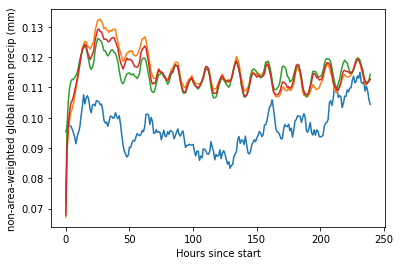

In [9]:
plt.plot(range(len(imerg.time)), imerg_ts)
for expt in EXPTS:
    pflux_ts = expt_pflux[expt].mean(dim=['ens_mem', 'latitude', 'longitude'])
    plt.plot(range(len(pflux_ts.time)), pflux_ts)
plt.xlabel('Hours since start')
plt.ylabel('non-area-weighted global mean precip (mm)')

In [10]:
def rmse(a1, a2):
    return np.sqrt(np.mean((a1 - a2)**2))

In [11]:
aspect = 1.43  # mean aspect ratio of cells over the tropics.
nsigma = 3
sel_tropics = {'latitude': slice(-30, 30)}
sigmas = [0, 1, 2, 4]
# dx / dy.

In [12]:
imerg_filtered = []
imerg_tropics = imerg.sel(**sel_tropics)

for sigma in sigmas:
    print(sigma)
    imerg_filtered_values = ndimage.gaussian_filter(imerg.sel(**sel_tropics), (0, aspect * sigma, sigma))
    da_imerg_filtered = imerg_tropics.copy()
    da_imerg_filtered.values = imerg_filtered_values
    imerg_filtered.append(da_imerg_filtered)
imerg_filtered = xr.concat(imerg_filtered, dim=pd.Index(sigmas, name='sigma'))
clear_output()

In [13]:
filtered_expt_pflux = {}

for expt in EXPTS:
    print(expt)
    pflux_tropics = expt_pflux[expt].sel(**sel_tropics)
    #print(da_pflux_filtered)
    
    pflux_filtered = []
    for sigma in sigmas:
        da_pflux_filtered = pflux_tropics.copy()

        print(sigma)
        for i in range(nens):
            if sigma != 0:    
                da_pflux_filtered.values[i] = ndimage.gaussian_filter(da_pflux_filtered.values[i], (0, aspect * sigma, sigma))
        pflux_filtered.append(da_pflux_filtered)
    pflux_filtered = xr.concat(pflux_filtered, dim=pd.Index(sigmas, name='sigma'))
            
    filtered_expt_pflux[expt] = pflux_filtered
#clear_output()

ctrl
0
1
2
4
vanillaMCSP
0
1
2
4
stochMCSP
0
1
2
4


In [14]:
np.abs(pflux_filtered.sel(sigma=0).values - pflux_tropics.values).max()

0.0

In [15]:
colors = ['#FFFFFF', '#0000FF', '#6495ED', '#7FFFD4', '#66CDAA', '#32CD32', '#ADFF2F', '#FFFF99', '#FFD700', '#FFA500', '#FF4500', '#800080']
# Create a custom colormap
cmap = mcolors.ListedColormap(colors)

0


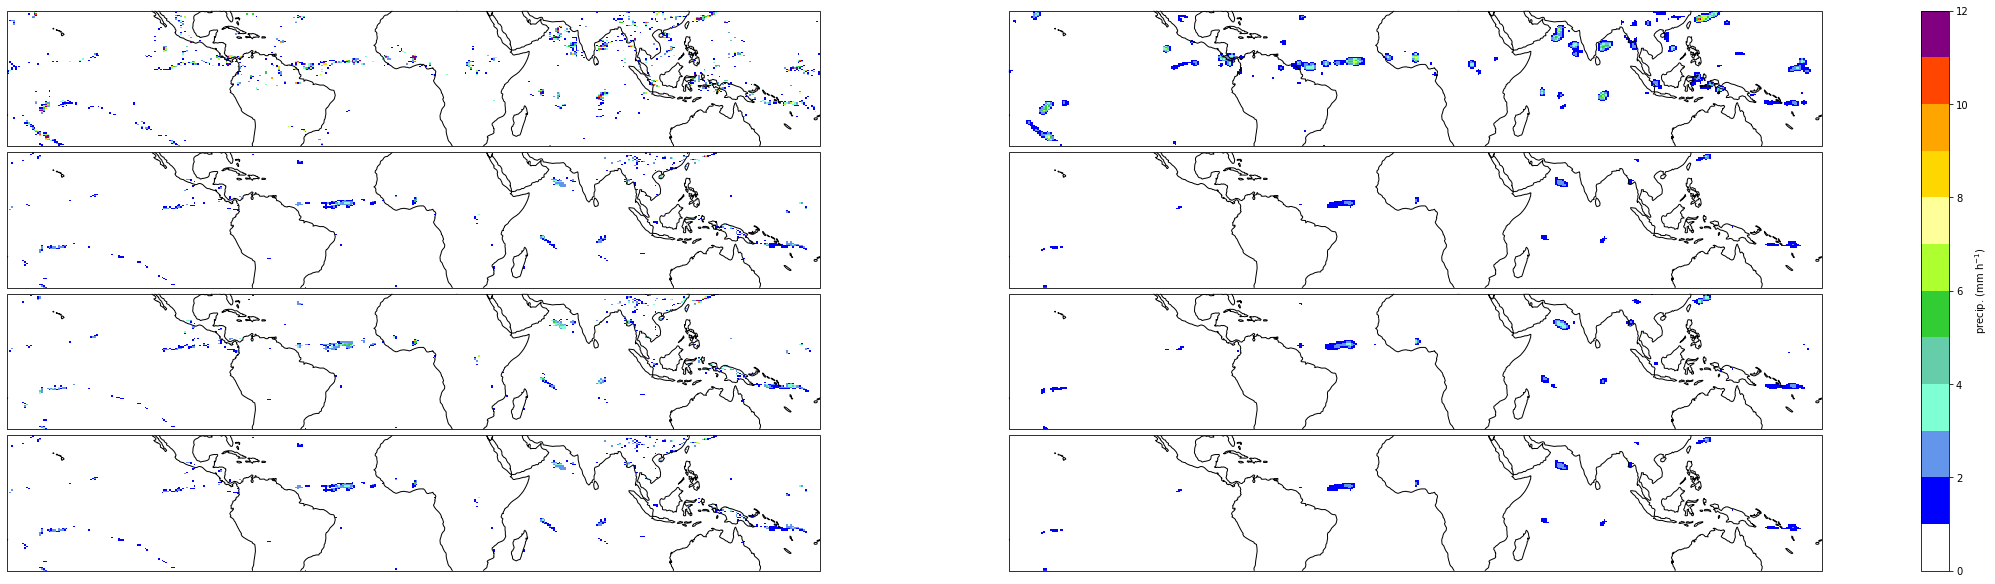

In [16]:
# %%capture
# %%script false --no-raise-error

# Set up the figure, the axis, and the plot element we want to animate
fig, axes = plt.subplots(4, 2, subplot_kw={'projection': ccrs.PlateCarree()}, layout='constrained')
fig.set_size_inches(30, 8)

# Update function for the animation
def plot_imerg_expts_sigmas(frame):
    print(frame)
    for ax in axes.flatten():
        ax.cla()
        ax.coastlines()
        ax.set_ylim((-30, 30))

    time = pd.Timestamp(filtered_expt_pflux['ctrl'].time[frame].values.item())
    for axrow, data in zip(
        axes, 
        [imerg_filtered] + [filtered_expt_pflux[expt].sel(ens_mem=0) for expt in EXPTS]
    ):
        for ax, sigma in zip(axrow, [0, 1]):
            im = ax.pcolormesh(data.longitude, data.latitude, data.sel(sigma=sigma)[frame], vmin=0, vmax=12, cmap=cmap)
    return im

im = plot_imerg_expts_sigmas(0)
plt.colorbar(im, ax=axes, label='precip. (mm h$^{-1}$)') 

In [17]:
filtered_expt_pflux['stochMCSP']

<xarray.DataArray 'precipitation_flux' (sigma: 4, ens_mem: 10, time: 240,
                                        latitude: 108, longitude: 432)>
array([[[[[3.10103986e-02, 2.14695378e-04, 1.22083575e-02, ...,
           1.85788386e-02, 4.82072464e-05, 5.68055722e-04],
          [1.66809303e-04, 2.93388846e-03, 3.89944110e-03, ...,
           1.82830337e-02, 2.30395943e-02, 2.68448144e-02],
          [3.95842217e-05, 2.13638749e-02, 3.24424982e-05, ...,
           1.30119389e-02, 1.95822548e-02, 5.31025726e-05],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[3.77704650e-02, 7.14298047e-04, 8.10317788e-03, ...,
           4.39509265e-02, 6.38197316e-03, 1.29948518e-07],
          [1.80284567e-02, 9.69067868e-03, 3.90137313e-03, ...,
           1.57634746e-02, 2.77027080e-04, 3.56630348e-02],
          [2.14507780e-03, 1.54258367e-02, 5.21816673e-06, ...,
           1.23750512e-02, 1.81899499e-02, 9.26499924e-05],
...
           3.07579030e-04, 2.18609232e-04, 1.77449576e-04],
          [2.32384500e-05, 2.57845950e-05, 3.03996749e-05, ...,
           3.20139719e-04, 2.26900665e-04, 1.83803277e-04],
          [2.22068829e-05, 2.46289874e-05, 2.90148801e-05, ...,
           3.26630077e-04, 2.31171609e-04, 1.87067053e-04]],

         [[3.66813433e-03, 3.58819729e-03, 3.43939196e-03, ...,
           1.69203873e-03, 1.57332025e-03, 1.51438406e-03],
          [3.69471754e-03, 3.61454301e-03, 3.46538308e-03, ...,
           1.74550898e-03, 1.62420329e-03, 1.56411936e-03],
          [3.74554843e-03, 3.66503908e-03, 3.51544493e-03, ...,
           1.84838800e-03, 1.72199716e-03, 1.65967003e-03],
          ...,
          [3.65382512e-05, 4.15118666e-05, 5.13152918e-05, ...,
           2.83997448e-04, 1.74299072e-04, 1.24464350e-04],
          [3.19027386e-05, 3.63417894e-05, 4.51201704e-05, ...,
           2.97644787e-04, 1.82484233e-04, 1.30165150e-04],
          [2.95538066e-05, 3.37189194e-05, 4.19712524e-05, ...,
           3.04706162e-04, 1.86715435e-04, 1.33109002e-04]]]]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -29.72 -29.17 -28.61 ... 28.61 29.17 29.72
  * longitude  (longitude) float32 0.4167 1.25 2.083 2.917 ... 357.9 358.7 359.6
  * time       (time) datetime64[ns] 2020-07-01T04:00:00 ... 2020-07-11T03:00:00
  * ens_mem    (ens_mem) int64 0 1 2 3 4 5 6 7 8 9
  * sigma      (sigma) int64 0 1 2 4
Attributes:
    standard_name:        precipitation_flux
    units:                mm h-1
    um_stash_source:      m01s05i216
    grid_mapping:         latitude_longitude
    UM simulation:        u-dg135
    MCS:PRIME expt:       stochMCSP
    created by:           /home/users/mmuetz/projects/mcs_prime/ctrl/stoch_tr...
    calling file source:  import numpy as np\nimport pandas as pd\nimport xar...
    project repository:   https://github.com/markmuetz/MCS_PRIME
    remake version:       ['0', '6', '3', '0', 'beta']
    remake repository:    https://github.com/markmuetz/remake
    task:                 24f222d8c0 N216ExtractCombinePrecip(expt='stochMCSP')
    task doc:             Extract and combine precipitation at all times and ...
    created on:           2024-08-08 11:40:22.494223
    nodename:             sci4.jasmin.ac.uk
    hostname:             jasmin
    output path:          /gws/nopw/j04/mcs_prime/mmuetz/data/UM_sims/u-dg135...
    contact:              mark.muetzelfeldt@reading.ac.uk
    coordinates:          forecast_period_0 forecast_reference_time_0

In [18]:
expt_eRMSE = {}
ntime = len(imerg.time)
for expt in EXPTS:

    eRMSE = np.full((len(sigmas), nens, ntime), np.nan)
    pflux_filtered = filtered_expt_pflux[expt]

    for ens_idx in range(nens):
        for sigma_idx in range(len(sigmas)):
            print(expt, ens_idx, sigma_idx)
            for time_idx in range(ntime):
                eRMSE[sigma_idx, ens_idx, time_idx] = rmse(imerg_filtered[sigma_idx, time_idx], pflux_filtered[sigma_idx, ens_idx, time_idx])
            clear_output()
    da_eRMSE = xr.DataArray(
        eRMSE,
        coords={
            'sigma': pflux_filtered['sigma'],
            'ens_mem': pflux_filtered['ens_mem'],
            'time': pflux_filtered['time'],
        }
    )
    expt_eRMSE[expt] = da_eRMSE



In [19]:
expt_dRMSE = {}
for expt in EXPTS:

    dRMSE = np.full((len(sigmas), nens, nens, ntime), np.nan)
    pflux_filtered = filtered_expt_pflux[expt]
    
    for ens_idx1 in range(nens):
        for ens_idx2 in range(ens_idx1 + 1, nens):
            print(expt, ens_idx1, ens_idx2)
            for sigma_idx in range(len(sigmas)):
                for time_idx in range(ntime):
                    dRMSE[sigma_idx, ens_idx1, ens_idx2, time_idx] = rmse(
                        pflux_filtered[sigma_idx, ens_idx1, time_idx], 
                        pflux_filtered[sigma_idx, ens_idx2, time_idx]
                    )
    da_dRMSE = xr.DataArray(
        dRMSE,
        coords={
            'sigma': pflux_filtered['sigma'],
            'ens_mem1': pflux_filtered['ens_mem'].values,
            'ens_mem2': pflux_filtered['ens_mem'].values,
            'time': pflux_filtered['time'],
        }
    )
    expt_dRMSE[expt] = da_dRMSE

clear_output()

In [91]:
plot_sigmas = [0, 2, 4]
def plot_spread_skill_ts(smooth=False, xlim='full', show_skill_minus_spread=False):
    fig, axes = plt.subplots(1, len(plot_sigmas), sharex=True, layout='constrained')
    fig.set_size_inches(20, 6)
    cs = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for ax, sigma in zip(axes, plot_sigmas):
        if smooth:
            ax.set_title(f'$\sigma=${sigma} ({smooth} h smoothing)')
        else:
            ax.set_title(f'$\sigma=${sigma}')
        for i, expt in enumerate(EXPTS):
            # dRMSE_ts = np.nanmean(expt_dRMSE[expt], axis=(0, 1))
            # eRMSE_ts = np.nanmean(expt_eRMSE[expt], axis=0)
            dRMSE_ts = expt_dRMSE[expt].mean(dim=['ens_mem1', 'ens_mem2']).sel(sigma=sigma).values
            eRMSE_ts = expt_eRMSE[expt].mean(dim=['ens_mem']).sel(sigma=sigma).values
            if smooth:
                dRMSE_ts = np.convolve(dRMSE_ts, np.ones((smooth, )) / smooth, mode='same')
                eRMSE_ts = np.convolve(eRMSE_ts, np.ones((smooth, )) / smooth, mode='same')
            c = cs[i]
            ax.plot(eRMSE_ts, color=c, label=f'{expt} skill')
            ax.plot(dRMSE_ts, ls='--', color=c, label=f'{expt} spread')
            if show_skill_minus_spread:
                ax.plot(eRMSE_ts - dRMSE_ts, ls=':', color=c, label=f'{expt} skill - spread')
                ax.axhline(y=0, ls='-', lw=0.5, color='k')
    
        times_half_days_hours = np.arange(0, ntime + 1, 12)
        times_days = [int(v) for v in times_half_days_hours / 24]
        times_days[1::2] = [''] * len(times_days[1::2])
        ax.set_xticks(times_half_days_hours, times_days)
        ax.set_xlim((0, ntime))
    axes[0].set_ylabel('RMSE (mm h$^{-1}$)')
    if xlim != 'full':
        ax.set_xlim(xlim)
    if smooth and xlim == 'full':
        ax.set_xlim((smooth, 240 - smooth))
    for ax in axes:
        ax.relim()
        if not show_skill_minus_spread:
            ax.set_ylim((0, None))
    if len(axes) % 2 == 1:
        midax = axes[len(axes) // 2]
        midax.legend(ncol=len(EXPTS))
        midax.set_xlabel('time (day)')
        ylim = midax.get_ylim()
        midax.set_ylim((ylim[0], ylim[1] * 1.2))
    else:
        axes[-1].legend(ncol=len(EXPTS))
        for ax in axes.flatten():
            ax.set_xlabel('time (day)')
            


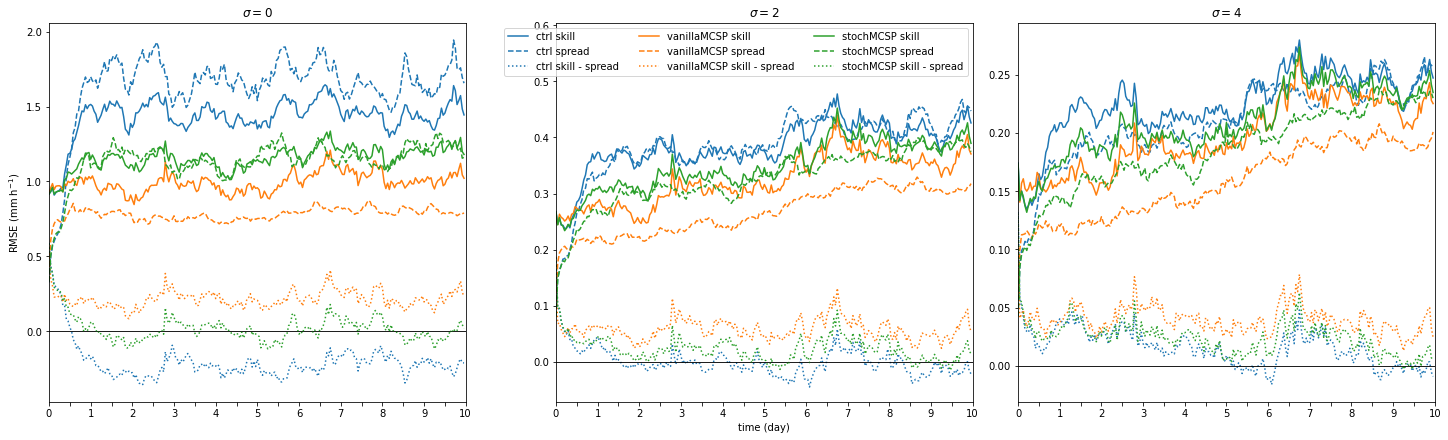

In [92]:
plot_spread_skill_ts(smooth=False, show_skill_minus_spread=True)

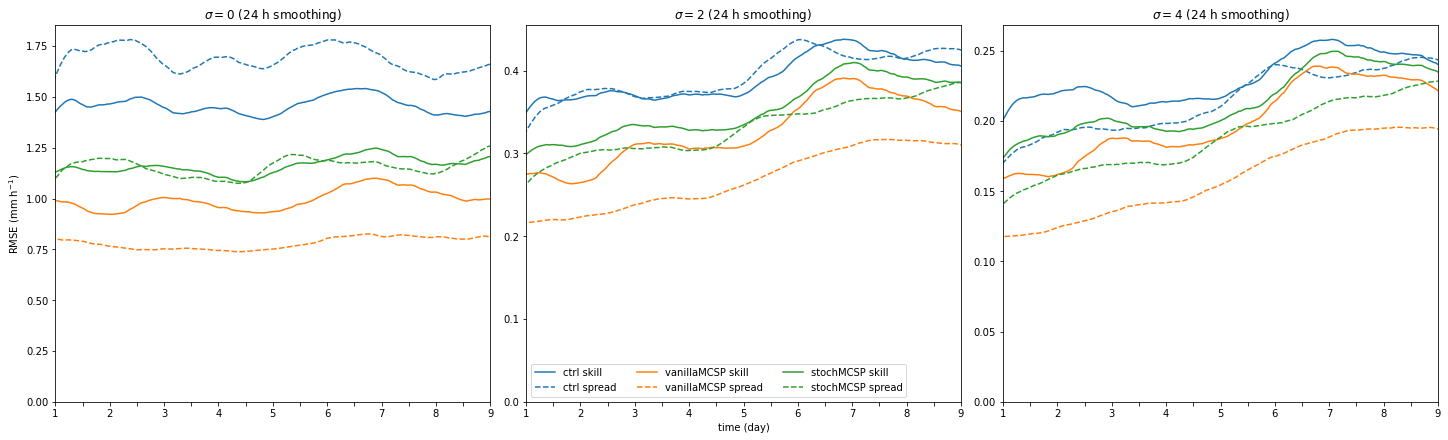

In [81]:
plot_spread_skill_ts(smooth=24)

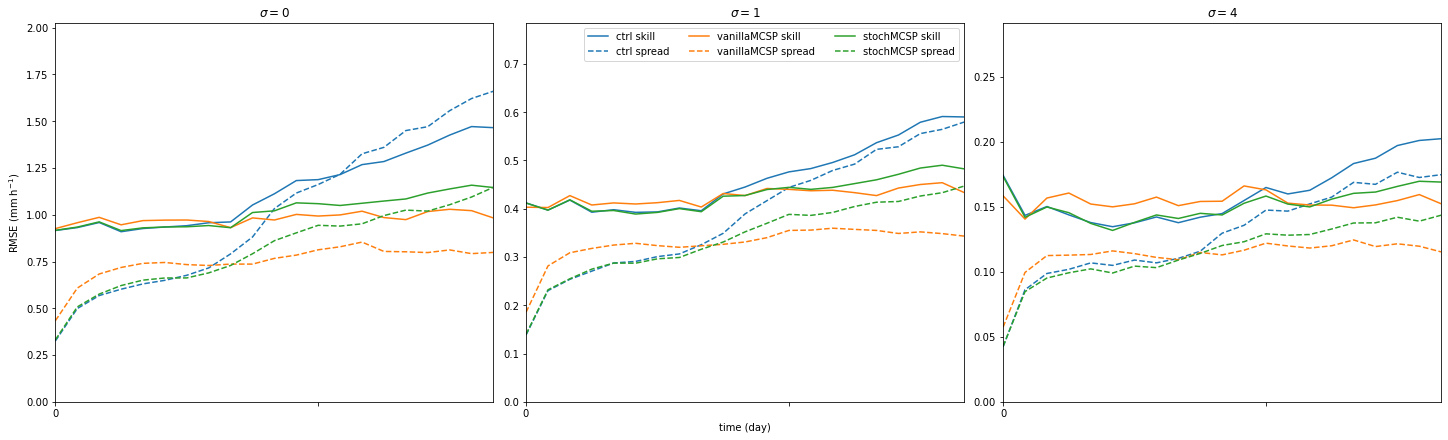

In [78]:
plot_spread_skill_ts(xlim=(0, 20))

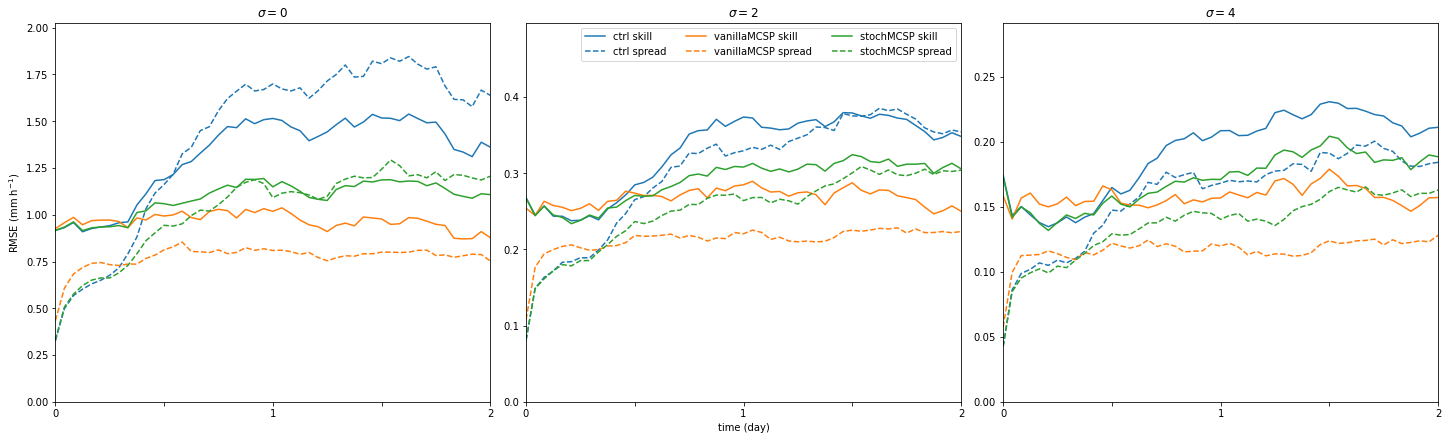

In [82]:
plot_spread_skill_ts(xlim=(0, 48))